In [1]:
import sys
from pathlib import Path
import os

# Get project root (parent of notebooks/)
PROJECT_ROOT = Path.cwd().parent.resolve()

# Add project root to Python path so src/ is importable
sys.path.insert(0, str(PROJECT_ROOT))

# Change working directory to project root
os.chdir(PROJECT_ROOT)

print("Project root set to:", PROJECT_ROOT)
print("Current working directory:", Path.cwd())

Project root set to: /raven/ptmp/cwinkler/ML-models/beyond-stoner-wohlfarth/single-grain-easy-axis-model
Current working directory: /raven/ptmp/cwinkler/ML-models/beyond-stoner-wohlfarth/single-grain-easy-axis-model


In [2]:
from scripts.analyze_magnetic_data import analyze_magnetic_data

## Beyond Stoner-Wohlfarth Single-grain easy axis model

### Data Pre-Processing

Shape of the DataFrame: (1497, 10)
No missing values in the DataFrame.
Basic statistics:
           Ms (A/m)       A (J/m)     K (J/m^3)  k1_theta  k1_phi  \
count  1.497000e+03  1.497000e+03  1.497000e+03    1497.0  1497.0   
mean   2.346634e+06  4.980778e-12  4.441019e+06       0.0     0.0   
std    9.683073e+05  2.883746e-12  2.811746e+06       0.0     0.0   
min    1.070453e+05  1.017197e-13  2.261398e+04       0.0     0.0   
25%    1.580172e+06  2.450223e-12  2.000995e+06       0.0     0.0   
50%    2.342924e+06  4.897740e-12  4.172896e+06       0.0     0.0   
75%    3.144879e+06  7.486598e-12  6.794677e+06       0.0     0.0   
max    3.973858e+06  9.998594e-12  9.995108e+06       0.0     0.0   
range  3.866813e+06  9.896874e-12  9.972494e+06       0.0     0.0   

            h_theta         h_phi      Hc (A/m)      Mr (A/m)  BHmax (J/m^3)  
count  1.497000e+03  1.497000e+03  1.497000e+03  1.497000e+03   1.497000e+03  
mean   1.788878e-02  1.570796e+00  2.095104e+06  1.895113e+06 

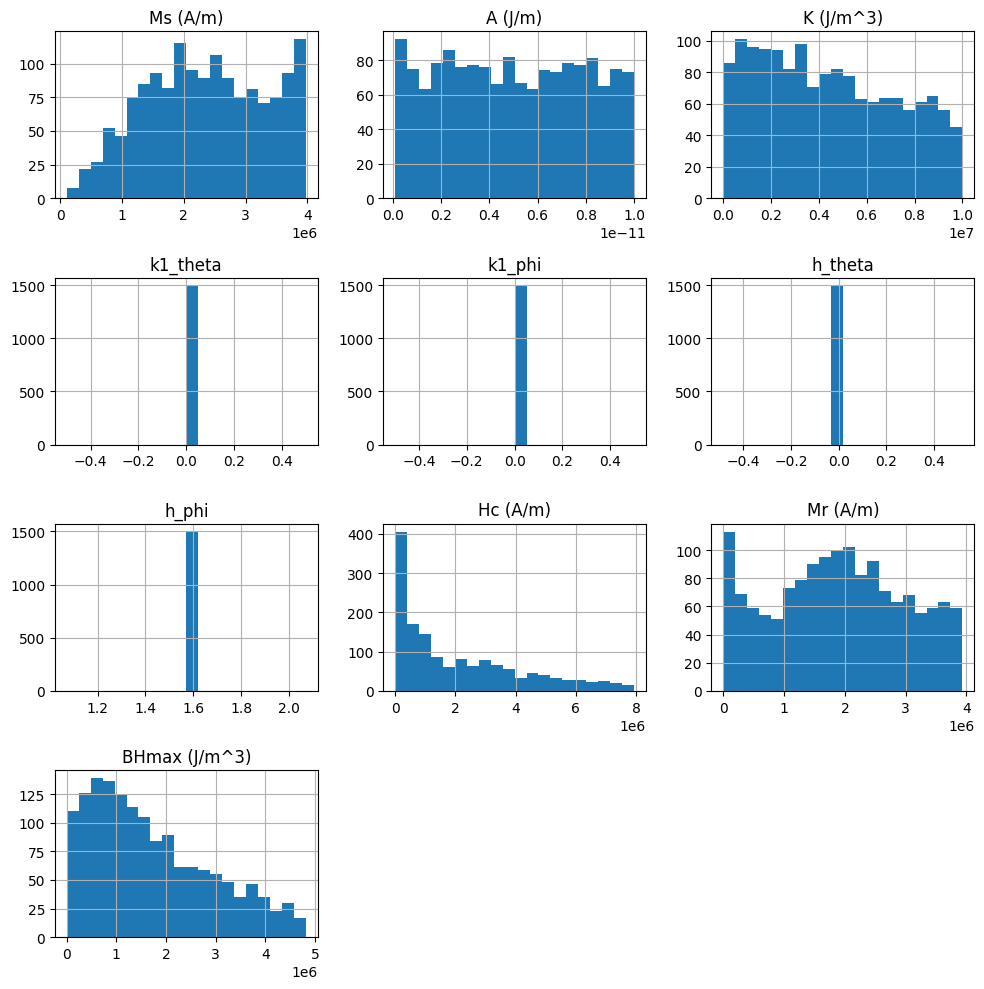

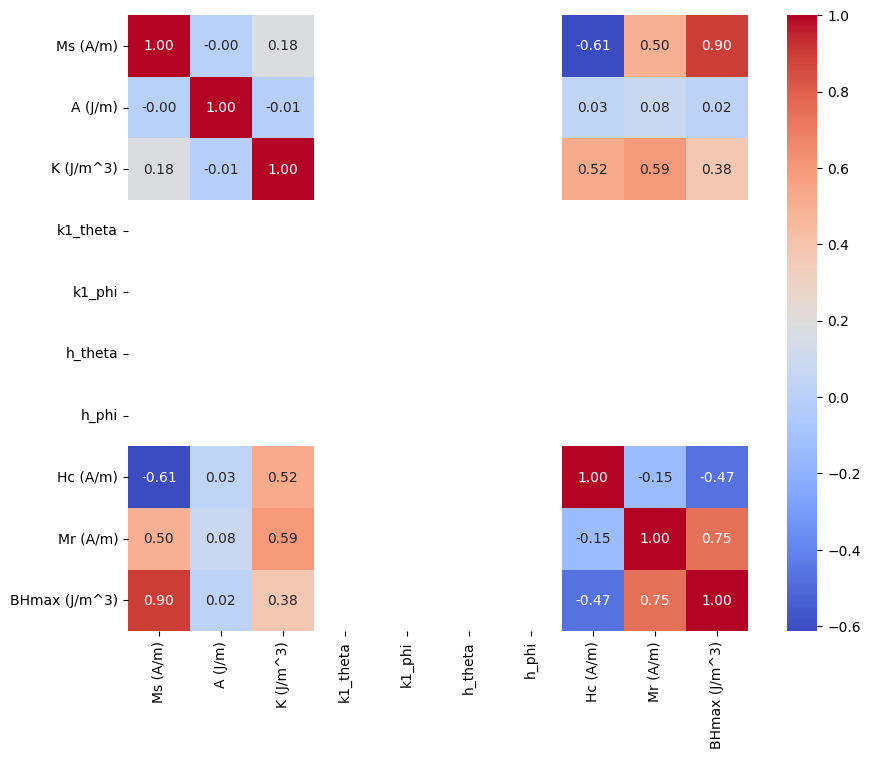

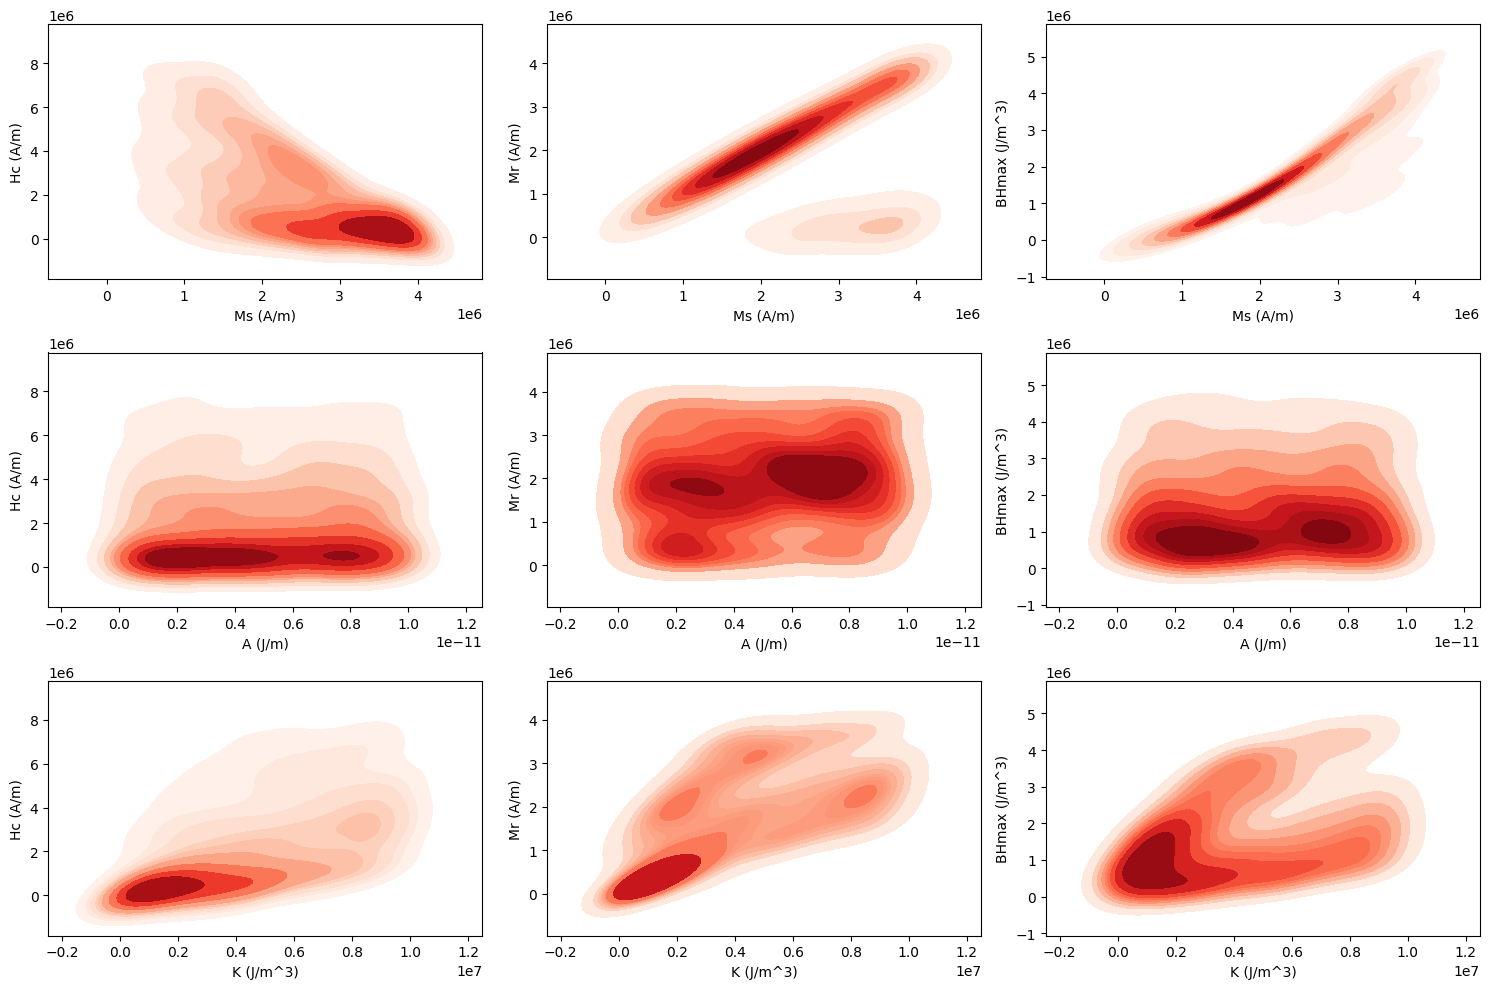

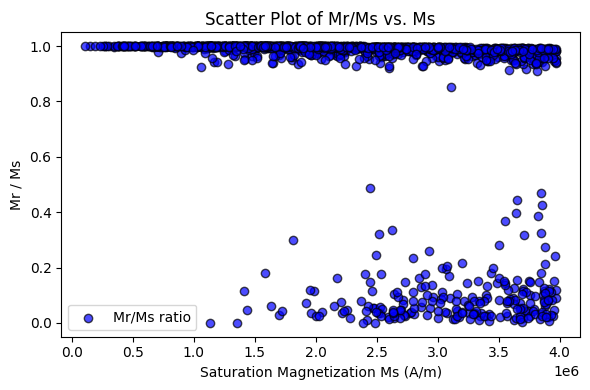

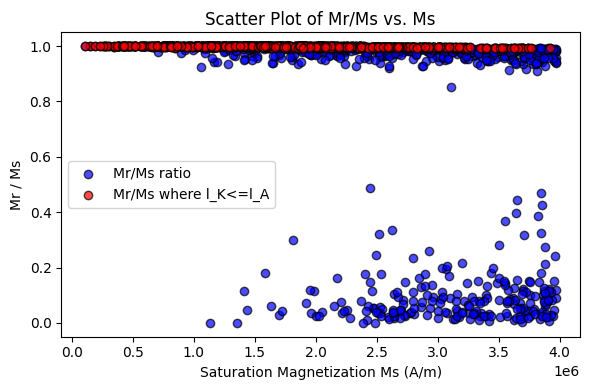

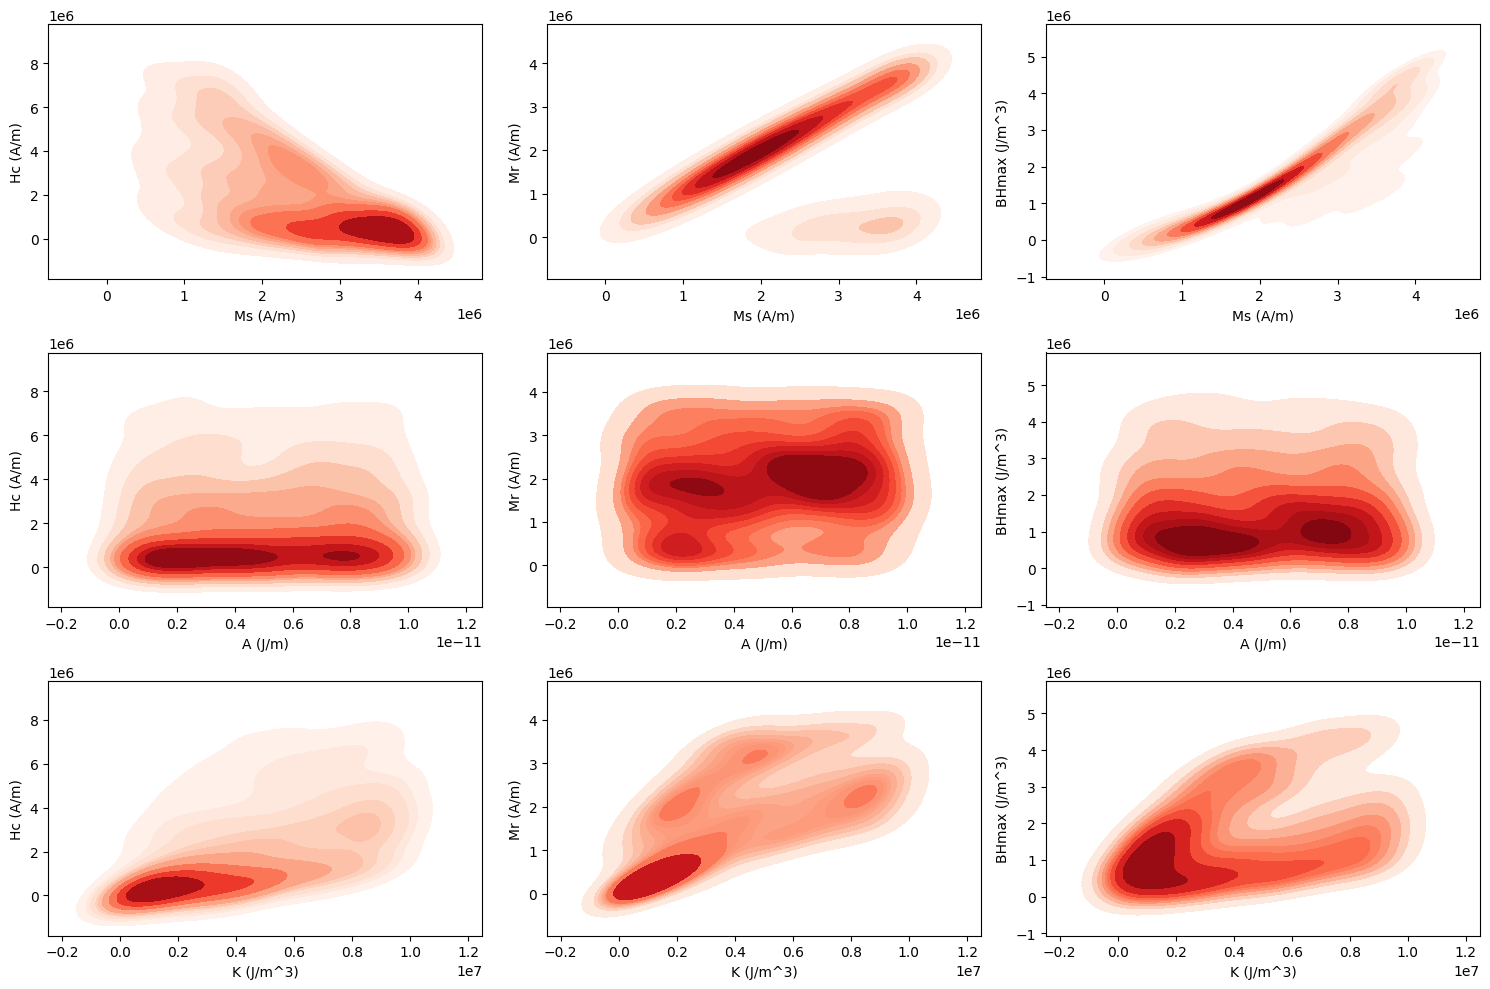

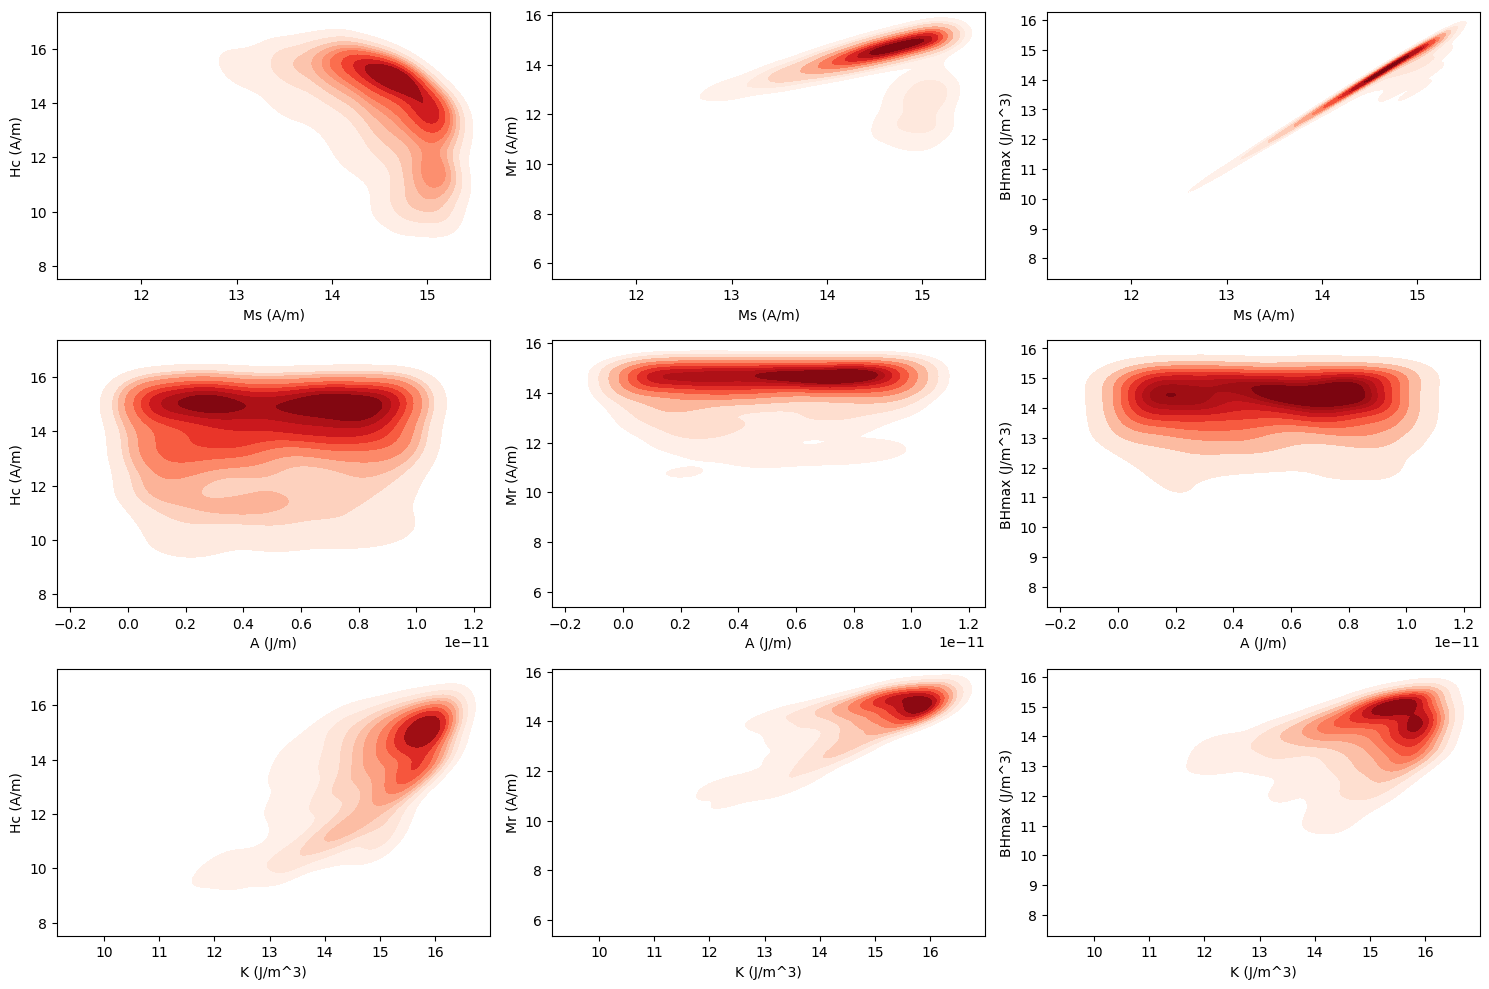

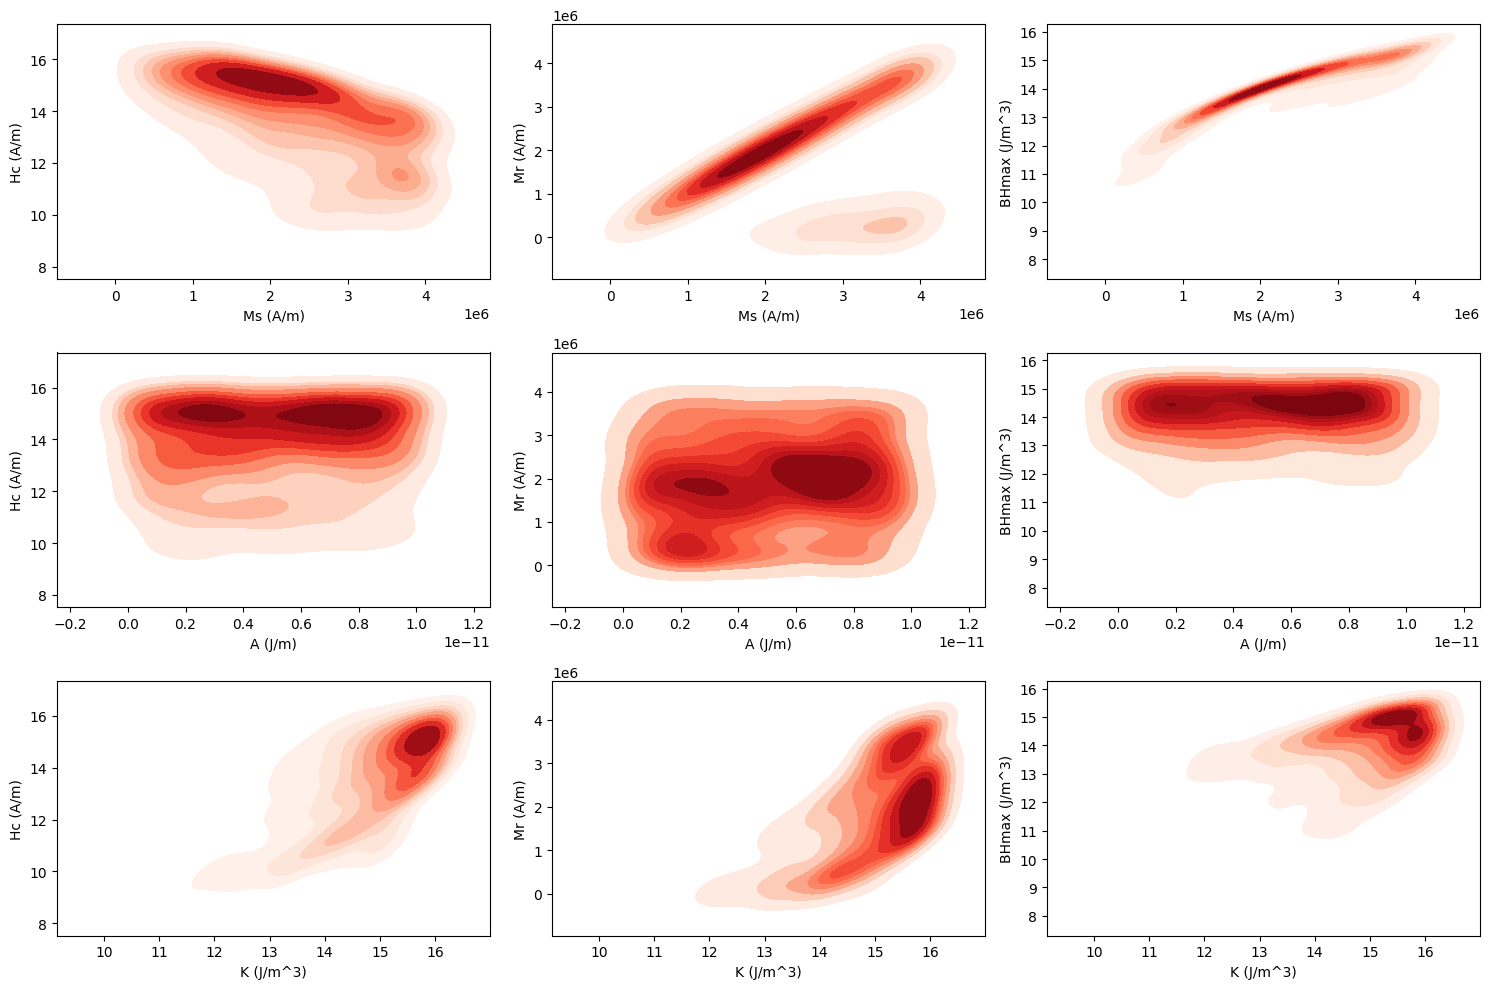

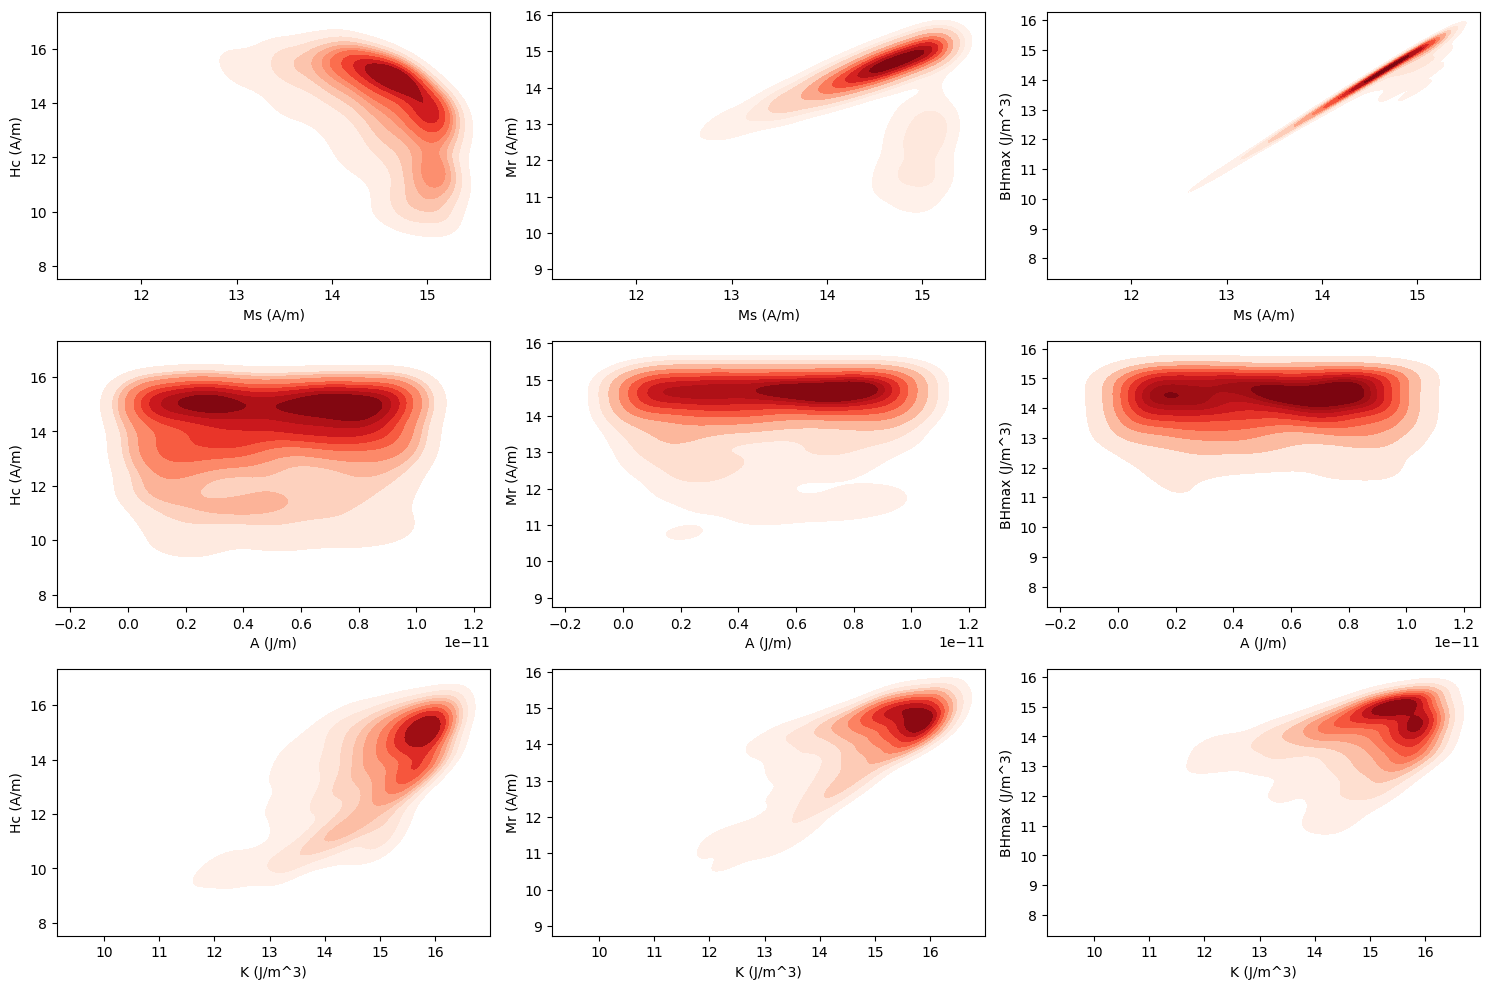

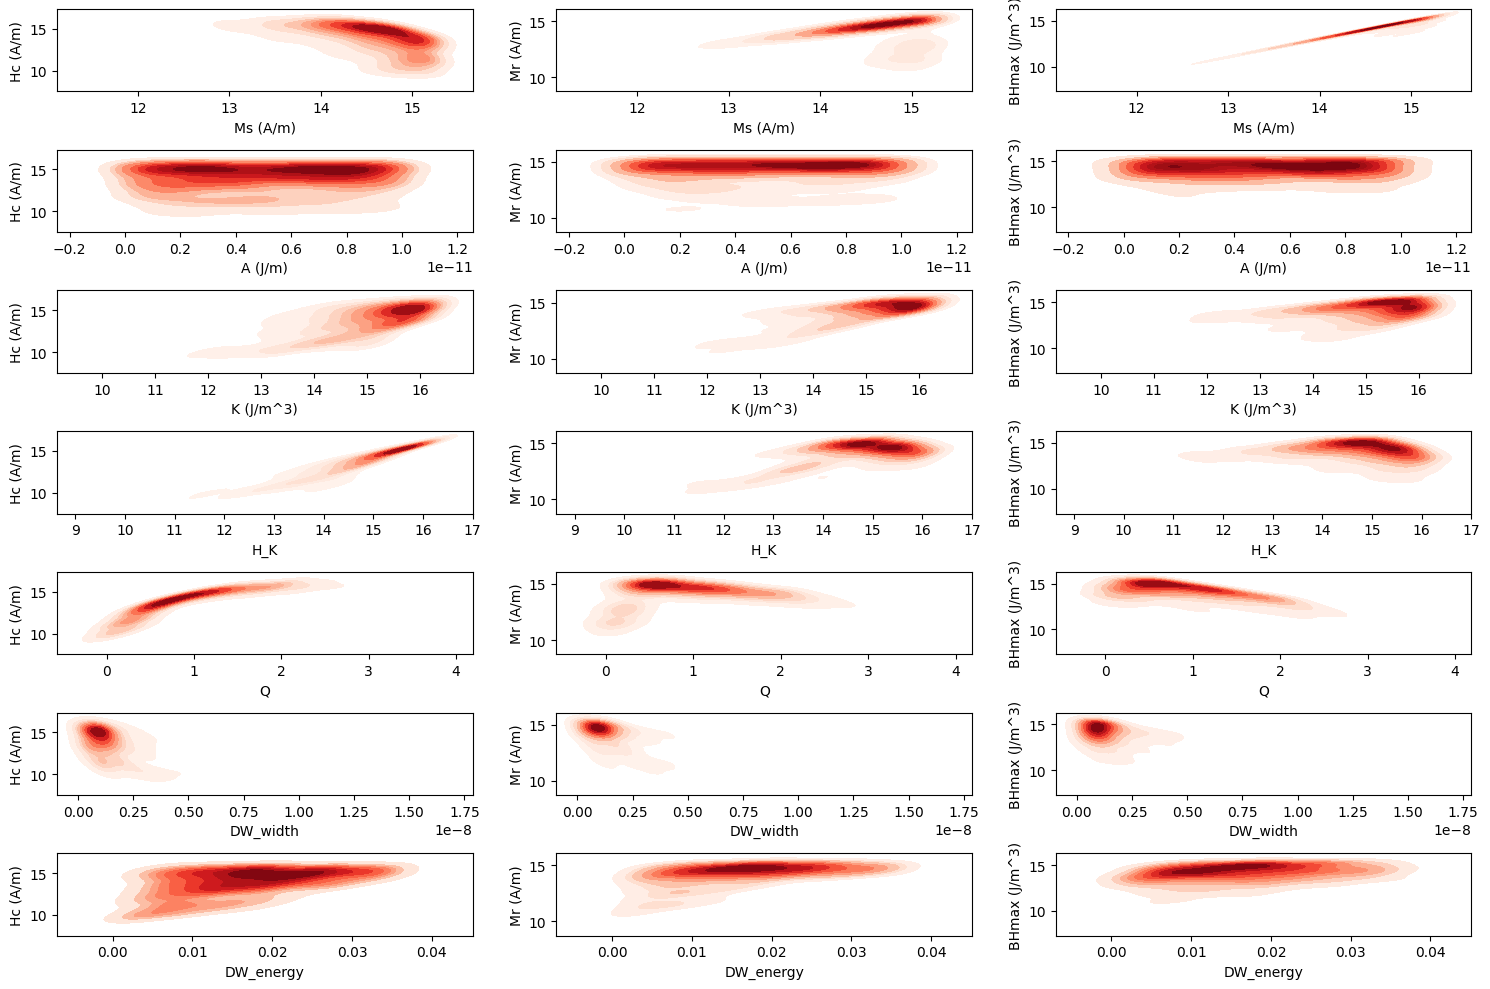

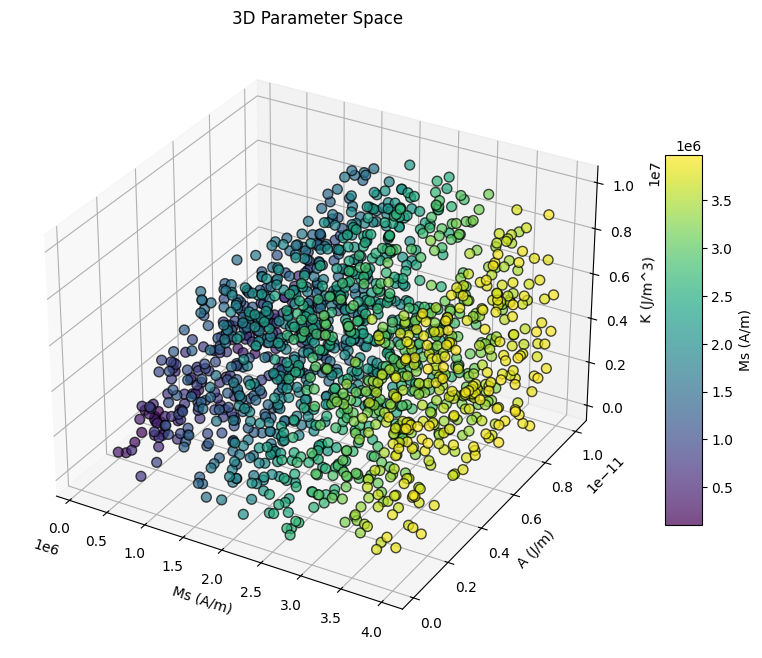


Performing clustering analysis...


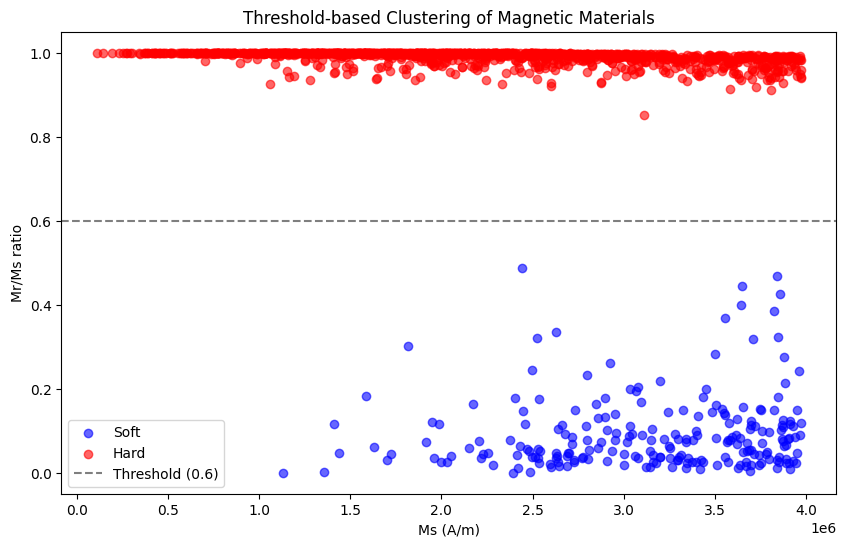


Threshold clustering results:
Number of soft magnets:  225
Number of hard magnets:  1272


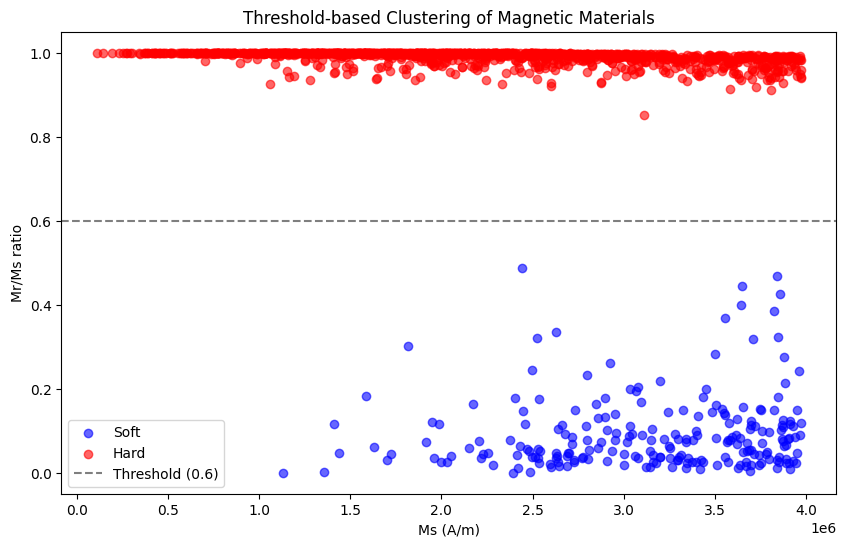

Training supervised classification model...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best parameters: {'estimator__max_depth': 12}

Model Performance on Test Set:
Accuracy: 0.9833
Precision: 0.9883
Recall: 0.9922
F1 Score: 0.9902

Classification Report:
              precision    recall  f1-score   support

        Soft       0.95      0.93      0.94        45
        Hard       0.99      0.99      0.99       255

    accuracy                           0.98       300
   macro avg       0.97      0.96      0.97       300
weighted avg       0.98      0.98      0.98       300



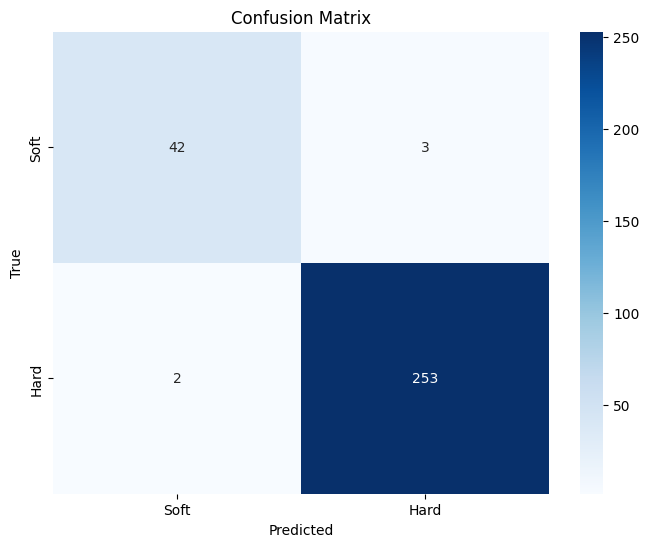

Pipeline saved to /raven/ptmp/cwinkler/ML-models/beyond-stoner-wohlfarth/single-grain-easy-axis-model/plots/supervised_clustering_pipeline.joblib
Model saved to /raven/ptmp/cwinkler/ML-models/beyond-stoner-wohlfarth/single-grain-easy-axis-model/plots/supervised_clustering_model.pkl
Metrics saved to /raven/ptmp/cwinkler/ML-models/beyond-stoner-wohlfarth/single-grain-easy-axis-model/plots/supervised_metrics.txt

Supervised clustering results:
Number of soft magnets:  224
Number of hard magnets:  1273

K-means clustering results:
Number of soft magnets:  225
Number of hard magnets:  1272

Analysis complete. Please check the plots directory for visualizations.


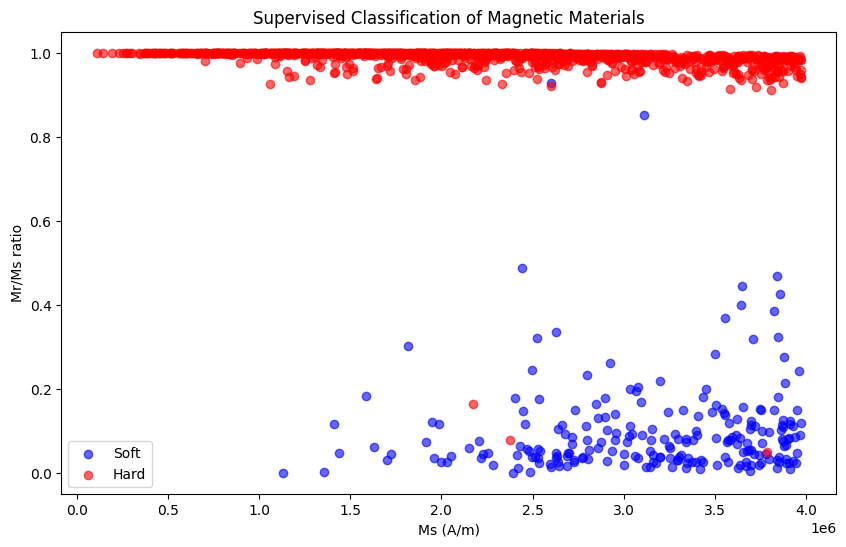

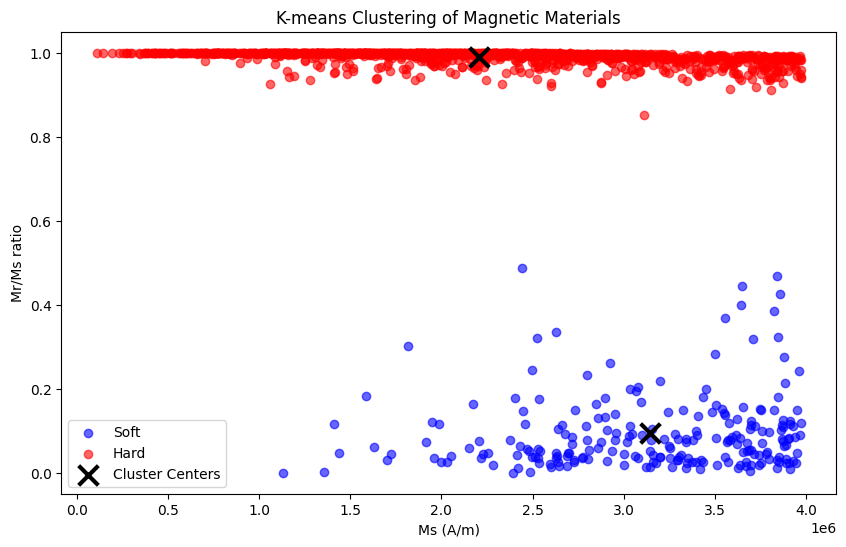

In [2]:
analyze_magnetic_data()

### Model training

In [3]:
from scripts.train_model import MLPipeline
import argparse

Failed to import duecredit due to No module named 'duecredit'


In [4]:
configpath = 'config/ml_config_test.yaml'

In [5]:
pipeline = MLPipeline(configpath)


Loaded configurations:
{
  "LogTransformation": {
    "remove_negative": true,
    "convert_to_tesla": false,
    "apply_log_transform": true
  }
}


Dataset loaded successfully
Dataset shape: (1497, 11)

Using clustering method: supervised
Loaded pipeline from /raven/ptmp/cwinkler/ML-models/beyond-stoner-wohlfarth/single-grain-easy-axis-model/plots/supervised_clustering_pipeline.joblib
Applied pre-trained supervised clustering model
Total samples: 1497
Cluster 0 samples: 224
Cluster 1 samples: 1273
Processed dataset: LogTransformation_all
Processed dataset: LogTransformation_cluster0
Processed dataset: LogTransformation_cluster1

Training and evaluating random_forest...

Processing all dataset...

Training random_forest on LogTransformation_all...
Using scaler: standard
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END .............................estimator__max_depth=4; total time=   0.8s
[CV] END .............................estimator__max_depth=4; total time=   0.8s
Best parameters: {'max_depth': 20}
Best score: 0.0773616707163787
Feature importance plot saved to results/plots/LogTransformation_all/random_fores

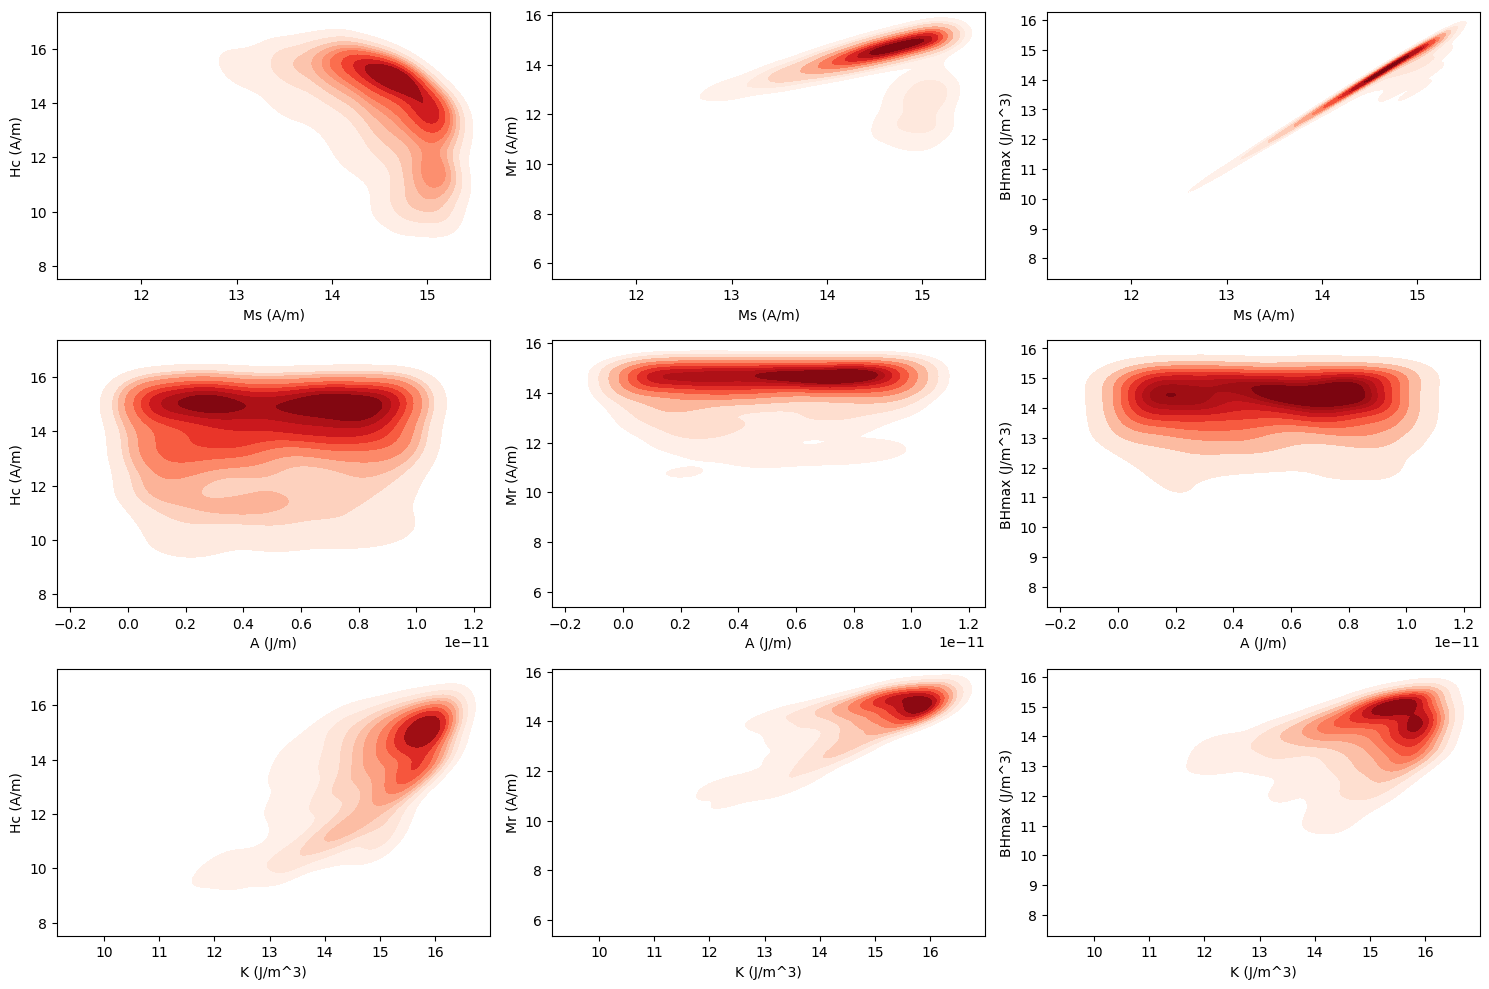

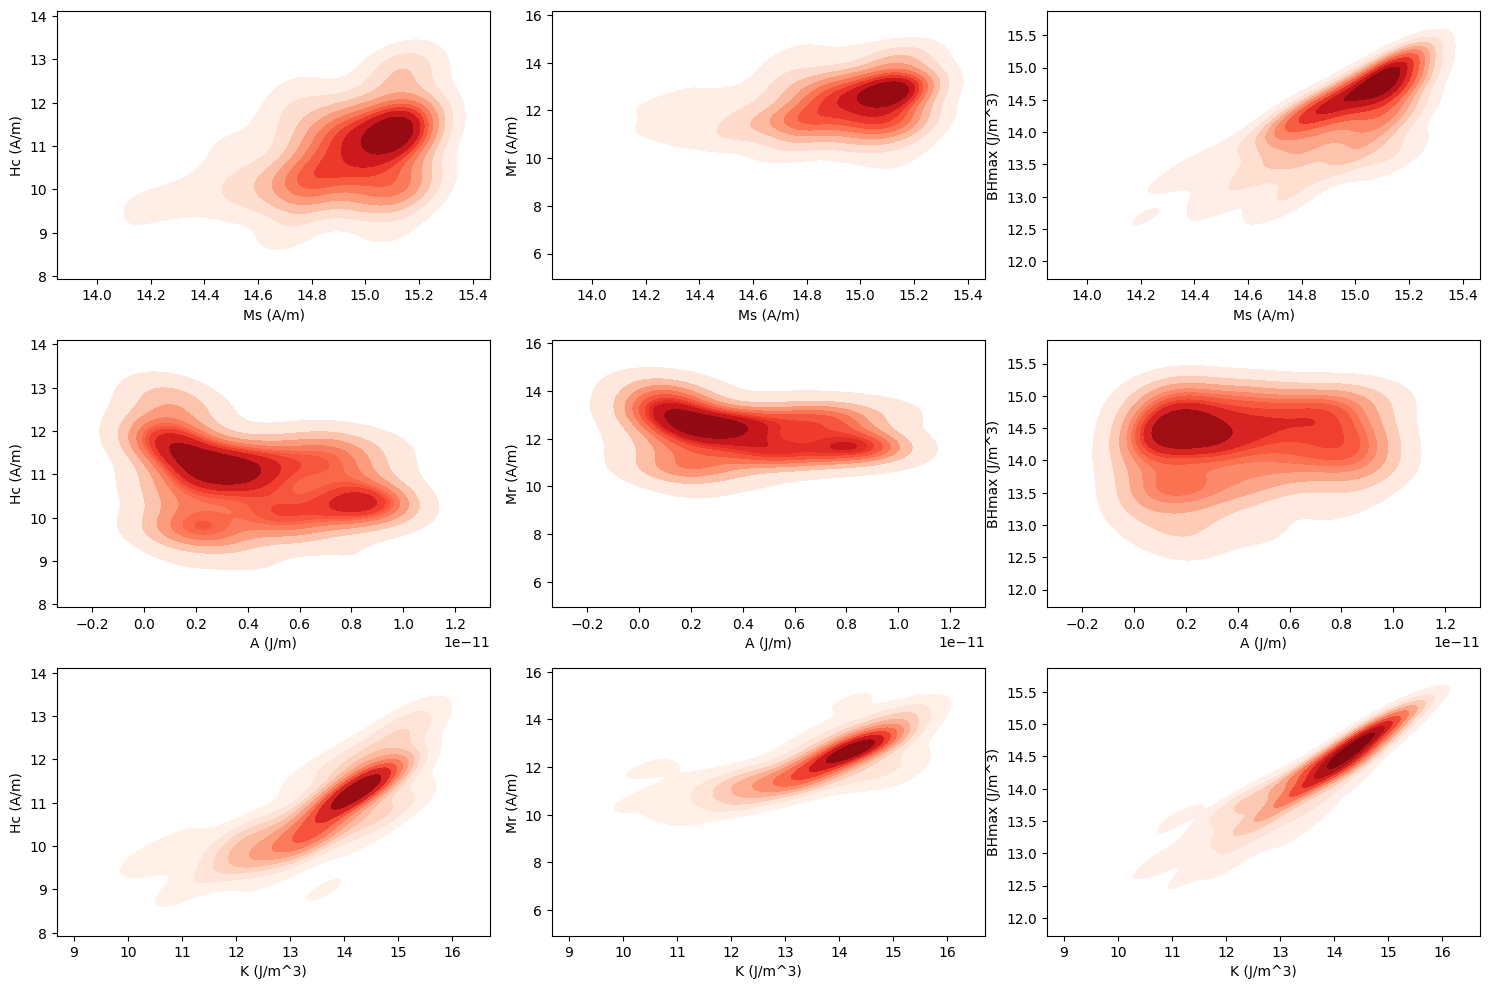

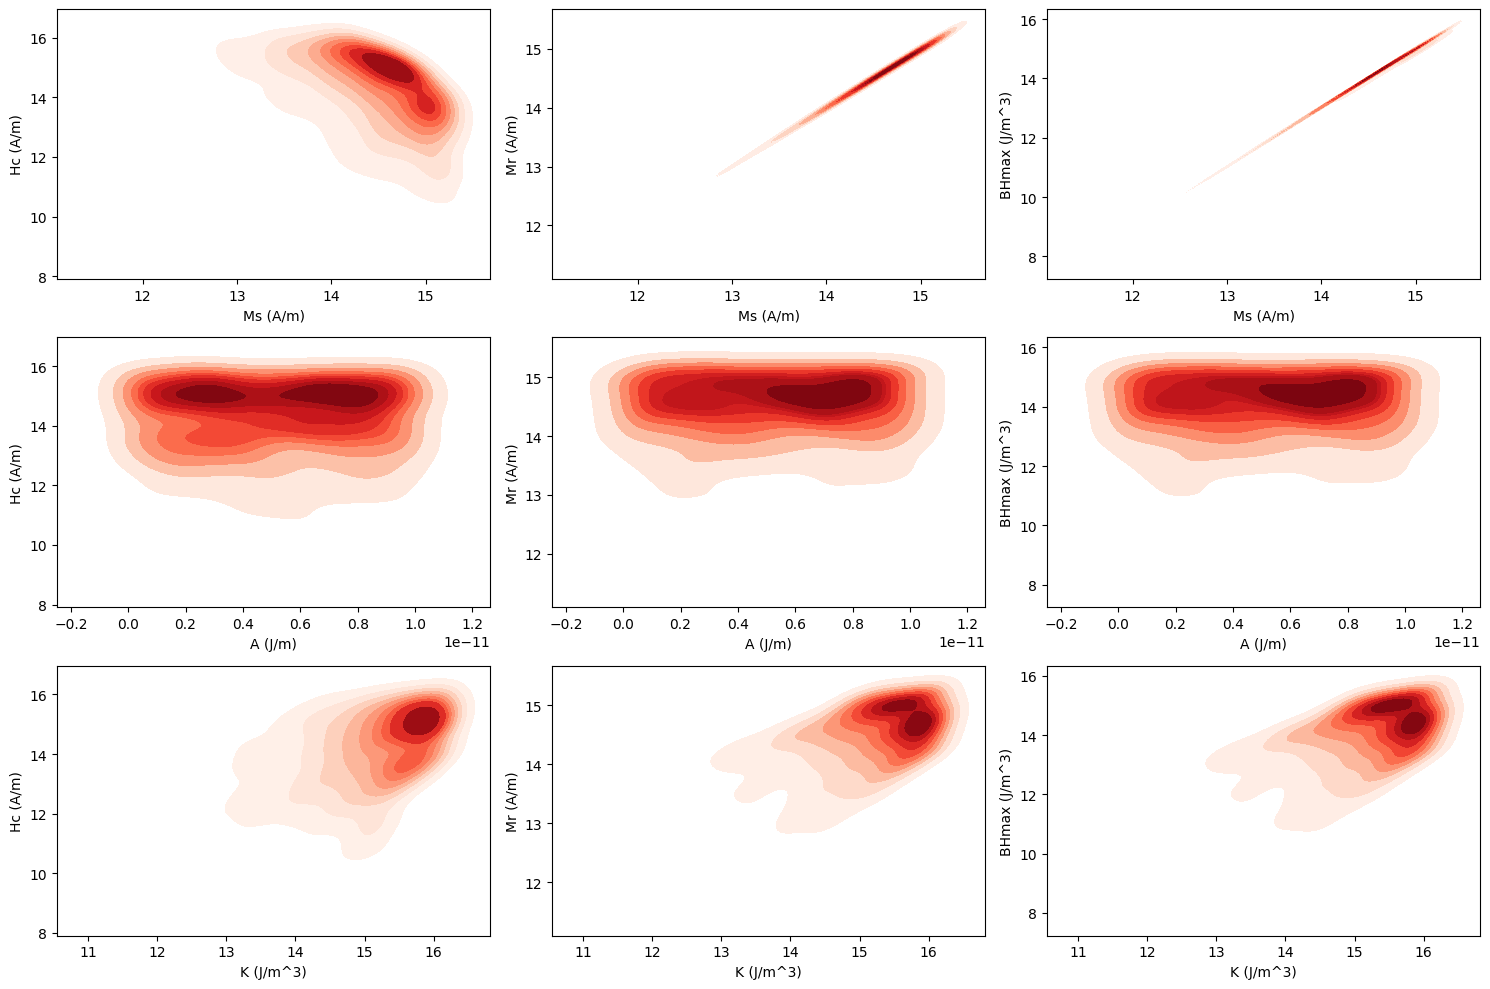

In [6]:
pipeline.run()

### Plot Metrics

In [7]:
from scripts.plot_metrics import *

In [8]:
results_dir = 'results/'

In [9]:
output = 'results/metric_tables'

In [10]:
# Set matplotlib style
plt.style.use('ggplot')

In [11]:
# Set default output directory as a subdirectory of the input directory
results_path = Path(results_dir)
if output is None:
    output_path = results_path / "metric_tables"
else:
    output_path = Path(output)

In [12]:
# Create output directory
output_path.mkdir(parents=True, exist_ok=True)

In [13]:
# Load results
results = load_results(results_dir)

In [14]:
# Create tables
create_metric_tables(results, output_path)
        
print(f"Tables and plots generated successfully in {output_path}")

Processing cluster0 data...
  Creating tables for dataset: LogTransformation_cluster0_standard
    Saved overall metrics to results/metric_tables/LogTransformation_cluster0_standard_overall_metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_Overall_metrics.png
    Creating table for variable: BHmax (J/m^3)
    Saved BHmax (J/m^3) metrics to results/metric_tables/LogTransformation_cluster0_standard_BHmax__J_m_3__metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_BHmax__J_m_3__metrics.png
    Creating table for variable: Hc (A/m)
    Saved Hc (A/m) metrics to results/metric_tables/LogTransformation_cluster0_standard_Hc__A_m__metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_Hc__A_m__metrics.png
    Creating table for variable: Mr (A/m)
    Saved Mr (A/m) metrics to results/metric_tables/LogTransformation_cluster0_standard_Mr__A_m__metrics.html
    Sav